In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nltk
import tensorflow as tf
import pandas as pd
import re
import seaborn as sns
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import gensim
from gensim.parsing.preprocessing import STOPWORDS
from gensim.utils import simple_preprocess
# import keras
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

In [2]:
#pip install wordcloud

In [3]:
bd_fake = pd.read_csv("Fake.csv")

In [4]:
bd_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
bd_true = pd.read_csv('True.csv')

In [6]:
bd_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [7]:
bd_true['is_fake'] = 0
bd_fake['is_fake'] = 1

In [8]:
final_bd = pd.concat([bd_true,bd_fake]).reset_index(drop = True)
final_bd

,title,text,subject,date,is_fake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1


In [9]:
#dropping date column 

final_bd.drop(columns = ['date'], inplace = True)


In [10]:
final_bd

,title,text,subject,is_fake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,0
...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,1
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,1
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,1
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,1


In [11]:
final_bd['news'] = final_bd['title'] + ' ' + final_bd['text']

In [12]:
final_bd

,title,text,subject,is_fake,news
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,0,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,0,U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,0,Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,0,FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,0,Trump wants Postal Service to charge 'much mor...
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,1,McPain: John McCain Furious That Iran Treated ...
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,1,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,1,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,1,How to Blow $700 Million: Al Jazeera America F...


In [13]:
final_bd['news'][5]

'White House, Congress prepare for talks on spending, immigration WEST PALM BEACH, Fla./WASHINGTON (Reuters) - The White House said on Friday it was set to kick off talks next week with Republican and Democratic congressional leaders on immigration policy, government spending and other issues that need to be wrapped up early in the new year. The expected flurry of legislative activity comes as Republicans and Democrats begin to set the stage for midterm congressional elections in November. President Donald Trump’s Republican Party is eager to maintain control of Congress while Democrats look for openings to wrest seats away in the Senate and the House of Representatives. On Wednesday, Trump’s budget chief Mick Mulvaney and legislative affairs director Marc Short will meet with Senate Majority Leader Mitch McConnell and House Speaker Paul Ryan - both Republicans - and their Democratic counterparts, Senator Chuck Schumer and Representative Nancy Pelosi, the White House said. That will be

<AxesSubplot:xlabel='Count', ylabel='subject'>

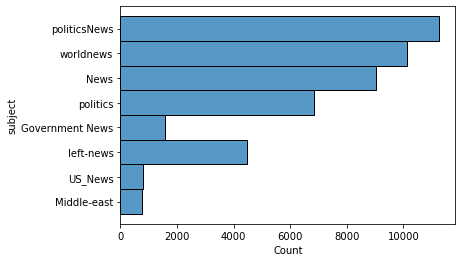

In [14]:
#Data Exploration 

sns.histplot(y = 'subject', data = final_bd)

<AxesSubplot:xlabel='Count', ylabel='is_fake'>

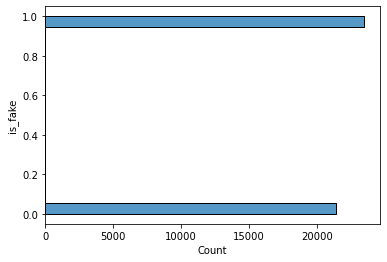

In [15]:
sns.histplot(y = 'is_fake', data = final_bd)


In [16]:
#Data Cleaning 

final_bd.drop(columns = ['title', 'text'], inplace = True)


In [17]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [18]:
#Stop words defined 
s_w = stopwords.words('english')
s_w.extend(['use', 're', 'edu', 'from', 'also'])

In [19]:
#we will be creating a function which stop words along with the words less than 2 characters 

def rem(text):
    result =[]
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in s_w:
            result.append(token)
            
    return result

In [20]:
final_bd['clean_news'] = final_bd['news'].apply(rem)

In [21]:
print(final_bd['clean_news'][0])

['budget', 'fight', 'looms', 'republicans', 'flip', 'fiscal', 'script', 'washington', 'reuters', 'head', 'conservative', 'republican', 'faction', 'congress', 'voted', 'month', 'huge', 'expansion', 'national', 'debt', 'cuts', 'called', 'fiscal', 'conservative', 'sunday', 'urged', 'budget', 'restraint', 'keeping', 'sharp', 'pivot', 'republicans', 'representative', 'mark', 'meadows', 'speaking', 'face', 'nation', 'drew', 'hard', 'line', 'federal', 'spending', 'lawmakers', 'bracing', 'battle', 'january', 'return', 'holidays', 'wednesday', 'lawmakers', 'begin', 'trying', 'pass', 'federal', 'budget', 'fight', 'likely', 'linked', 'issues', 'immigration', 'policy', 'november', 'congressional', 'election', 'campaigns', 'approach', 'republicans', 'seek', 'control', 'congress', 'president', 'donald', 'trump', 'republicans', 'want', 'budget', 'increase', 'military', 'spending', 'democrats', 'want', 'proportional', 'increases', 'defense', 'discretionary', 'spending', 'programs', 'support', 'educati

In [22]:
#creating a list of words

words_list = []
for i in final_bd.clean_news:
    for j in i:
        words_list.append(j)

In [23]:
#finding the total amount of unique words which are required to build the LSTM model

unique_words = len(list(set(words_list)))
unique_words

108705

In [24]:
#List of words turned into a string 
final_bd['clean_news_joined'] = final_bd['clean_news'].apply(lambda x: " ".join(x))
final_bd.drop(columns = ['clean_news', 'news'], inplace = True)

In [25]:
final_bd

,subject,is_fake,clean_news_joined
0,politicsNews,0,budget fight looms republicans flip fiscal scr...
1,politicsNews,0,military accept transgender recruits monday pe...
2,politicsNews,0,senior republican senator mueller washington r...
3,politicsNews,0,russia probe helped australian diplomat washin...
4,politicsNews,0,trump wants postal service charge amazon shipm...
...,...,...,...
44893,Middle-east,1,mcpain john mccain furious iran treated sailor...
44894,Middle-east,1,justice yahoo settles mail privacy class actio...
44895,Middle-east,1,sunnistan allied safe zone plan territorial bo...
44896,Middle-east,1,blow million jazeera america finally calls qui...


In [26]:
#Preparing data for model training 

import nltk 
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\makhi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
#finding the maximum number of words in a news which is needed when we are padding the tokenized data
maxlen = -1
for doc in final_bd.clean_news_joined:
    tokens = nltk.word_tokenize(doc)
    if(maxlen < len(tokens)):
        maxlen = len(tokens)
    print("the maximum number of words in a news",maxlen)

the maximum number of words in a news 383
the maximum number of words in a news 383
the maximum number of words in a news 383
the maximum number of words in a news 383
the maximum number of words in a news 435
the maximum number of words in a news 435
the maximum number of words in a news 435
the maximum number of words in a news 435
the maximum number of words in a news 435
the maximum number of words in a news 435
the maximum number of words in a news 435
the maximum number of words in a news 435
the maximum number of words in a news 435
the maximum number of words in a news 435
the maximum number of words in a news 435
the maximum number of words in a news 435
the maximum number of words in a news 435
the maximum number of words in a news 435
the maximum number of words in a news 435
the maximum number of words in a news 435
the maximum number of words in a news 435
the maximum number of words in a news 464
the maximum number of words in a news 464
the maximum number of words in a n

In [28]:
#Splitting the data into train and test 

from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(final_bd.clean_news_joined, final_bd.is_fake, test_size = 0.2)

In [29]:
#word tokenizing

from nltk import word_tokenize 
tokenizer = Tokenizer(num_words = unique_words)
tokenizer.fit_on_texts(x_train)

train_sequence = tokenizer.texts_to_sequences(x_train)
test_sequence = tokenizer.texts_to_sequences(x_test)

In [30]:
#Add padding
pad_train = pad_sequences(train_sequence, maxlen = 4406, padding = 'post', truncating = 'post' )
pad_test = pad_sequences(test_sequence, maxlen = 4406, padding = 'post')

In [31]:
def LSTM_mod():
    model = Sequential()
    model.add(Embedding(unique_words, output_dim = 256)),
    model.add(Bidirectional(LSTM(128)))
    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(64, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))

    model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['acc'])
  
    return model

In [32]:
model = LSTM_mod()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 256)         27828480  
                                                                 
 bidirectional (Bidirectiona  (None, 256)              394240    
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 28,263,937
Trainable params: 28,263,937
Non-trainable params: 0
____________________________________________

In [33]:
y_train = np.asarray(y_train)

In [ ]:
#model training
model.fit(pad_train, y_train, batch_size = 64, validation_split = 0.1, epochs = 2)

Epoch 1/2
  9/506 [..............................] - ETA: 98:27:32 - loss: 0.6881 - acc: 0.5747

In [ ]:
#prediction
predicted_result = model.predict(pad_test)

In [ ]:
prediction = []
for i in range (len(predicted_result)):
    if predicted_result[i].item() > 0.5:
        prediction.append(1)
    else:
        prediction.append(0)

In [ ]:
from sklearn.metrics import accuracy_score 
accuracy = accuracy_score(list(y_test), prediction)

print(accuracy)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(list(y_test), prediction)
plt.figure(figsize = (8,8))
sns.heatmap(cm, annot = True)